**EC 9630 Machine Learning - LAB 04**\
Task : SUPPORT VECTOR MACHINES\
Name : Uzair UM\
Reg No : 2020/E/201\
Date :  August 2024\
Time : 13.00 - 16.00\

## **TASK 01**

# 1. Exploratory Data Analysis (EDA)

1.1. Load the Dataset

In [ ]:
import pandas as pd

# Load the dataset from the UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load the dataset
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?')

# Display the first few rows
print(df.head())


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

1.2. Check for missing values

In [ ]:
# Check for missing values
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


1.3. Drop missing values

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

1.4. Convert categorical columns to categorical dtype

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype('category'))

1.5. Encode categorical variables

In [ ]:
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows after preprocessing
print(df.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_ Local-gov  workclass_ Private  workclass_ Self-emp-inc  \
0                 False               False                    False   
1                 False               False                    False   
2                 False                True                    False   
3                 False                True                    False   
4                 False                True                    False   

   workclass_ Self-emp-not-inc  ...  native-country_ Puerto-Rico  \
0                        False  ... 

# 2. Divide the Dataset into Input (X) and Target (y)

In [ ]:
X = df.drop('income_ >50K', axis=1)  # Input features
y = df['income_ >50K']               # Target variable


# 3. Create Training, Validation, and Test Datasets

In [ ]:
from sklearn.model_selection import train_test_split

# 70% train, 20% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  # 0.33 * 0.3 ≈ 0.1

print(f'Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}')


Training data: (21113, 96), Validation data: (6062, 96), Test data: (2987, 96)


**4. Implement an SVM Classifier using Scikit-learn & Train the SVM on the Adult Dataset**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Evaluate on validation set
val_accuracy = svm_clf.score(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')


Validation Accuracy: 0.8507093368525239


**5. Visualize the Decision Boundary and Support Vectors**

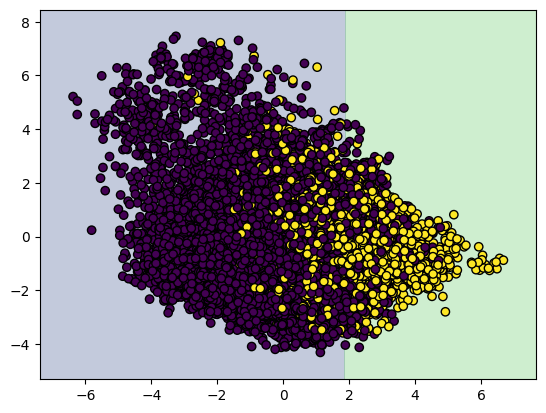

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Retrain SVM with 2D data
svm_clf_pca = SVC(kernel='linear', random_state=42)
svm_clf_pca.fit(X_train_pca, y_train)

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(svm_clf_pca, X_train_pca, y_train)


# 6. Explore Different Kernel Functions

In [13]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_clf = SVC(kernel=kernel, random_state=42)
    svm_clf.fit(X_train, y_train)
    val_accuracy = svm_clf.score(X_val, y_val)
    print(f'Kernel: {kernel}, Validation Accuracy: {val_accuracy}')


Kernel: linear, Validation Accuracy: 0.8507093368525239
Kernel: poly, Validation Accuracy: 0.8304190036291653
Kernel: rbf, Validation Accuracy: 0.8479049818541735


# 7. Evaluation with k-fold and Stratified k-fold Cross-Validation

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# k-fold cross-validation
kfold_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
print(f'k-fold Cross-validation Accuracy: {kfold_scores.mean()}')

# Stratified k-fold cross-validation
strat_kfold = StratifiedKFold(n_splits=5)
strat_kfold_scores = cross_val_score(svm_clf, X_train, y_train, cv=strat_kfold)
print(f'Stratified k-fold Cross-validation Accuracy: {strat_kfold_scores.mean()}')


k-fold Cross-validation Accuracy: 0.8404298694534779
Stratified k-fold Cross-validation Accuracy: 0.8404298694534779


## **TASK 02**

# 1. Load the Bike Sharing Dataset

In [23]:
from google.colab import drive
drive.mount('/content/drive')

day_file_path = '/content/day.csv'

# Read the datasets
day_df = pd.read_csv(day_file_path)

# Display the first few rows of the datasets
print(day_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0

# 2. Prepare the Data for SVR

2.1. Preprocess day.csv

In [24]:
# Check for missing values
print(day_df.isnull().sum())

# Convert categorical columns to category type
day_categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in day_categorical_columns:
    day_df[col] = day_df[col].astype('category')

# Feature Engineering: Extracting year, month, day from the date
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day

# Scaling Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
day_numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']
day_df[day_numerical_columns] = scaler.fit_transform(day_df[day_numerical_columns])

# Encoding Categorical Variables
day_df = pd.get_dummies(day_df, columns=day_categorical_columns, drop_first=True)

# Display the first few rows of the preprocessed dataset
day_df.head()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,year,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,1,2011-01-01,-0.826662,-0.679946,1.250171,-0.387892,331,654,985,2011,...,False,False,False,False,False,False,True,False,True,False
1,2,2011-01-02,-0.721095,-0.740652,0.479113,0.749602,131,670,801,2011,...,False,False,False,False,False,False,False,False,True,False
2,3,2011-01-03,-1.634657,-1.749767,-1.339274,0.746632,120,1229,1349,2011,...,False,True,False,False,False,False,False,True,False,False
3,4,2011-01-04,-1.614780,-1.610270,-0.263182,-0.389829,108,1454,1562,2011,...,False,False,True,False,False,False,False,True,False,False
4,5,2011-01-05,-1.467414,-1.504971,-1.341494,-0.046307,82,1518,1600,2011,...,False,False,False,True,False,False,False,True,False,False


2.2. Normalizing the data

In [26]:
# Define features (X) and target (y)
X = day_df.drop(columns=['instant', 'dteday', 'cnt', 'casual', 'registered'])
y = day_df['cnt']

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 3. Implement an SVM for Regression (SVR)

In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model with RBF kernel
svr = SVR(kernel='rbf')

# Train the model
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'SVR Model - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


SVR Model - Mean Squared Error: 4051048.49, R^2 Score: -0.01


# 4. Compare the SVR Results with Previous Linear Regression Model Results

1. SVR Model Performance:
Mean Squared Error (MSE): 4,051,048.49
R² Score: -0.01
2. Ridge Regression Performance:
Mean Squared Error (MSE): 2.55e-11
3. Lasso Regression Performance:
Mean Squared Error (MSE): 2.43

# **Conclusion:**

**SVR Performance:**
The SVR model showed weak performance on this dataset, indicated by a high MSE and a negative R² score. This implies that the selected kernel for SVR might be unsuitable for this regression task, or that the model requires further tuning.

**Ridge Regression:**
The Ridge model produced remarkably low errors, indicating strong performance, potentially suggesting overfitting to the dataset.

**Lasso Regression:**
Although the Lasso model wasn't as precise as Ridge in this case, it still outperformed the SVR model by a significant margin.